In [72]:

# Setup (Libraries + Config)

!pip -q install folium plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import warnings, re
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", 100)


In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:

crime_path = "/content/drive/MyDrive/sampled_crime_dataset.csv"
divvy_path = "/content/drive/MyDrive/sampled_divvy_dataset.csv"



In [75]:
crime = pd.read_csv(crime_path, low_memory=False)
divvy = pd.read_csv(divvy_path, low_memory=False)

print("Crime shape:", crime.shape)
print("Divvy shape:", divvy.shape)

Crime shape: (2890434, 21)
Divvy shape: (19899, 18)


In [76]:

#Quick Schema Overview

def quick_overview(df, name):
    print(f"\n=== {name}: HEAD ===")
    display(df.head(3))
    print(f"=== {name}: INFO ===")
    display(df.info()) # Print the DataFrame's information (column names, data types, non-null counts, etc.)
    print(f"=== {name}: NA COUNT (Top 20) ===") # Shows the top 20 columns with the highest number of missing (NaN) values
    display(df.isna().sum().sort_values(ascending=False).head(20))

quick_overview(crime, "CRIME")
quick_overview(divvy, "DIVVY")



=== CRIME: HEAD ===


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,date,block,primary type,description,location description,arrest,domestic,beat,district,community area,fbi code,x coordinate,y coordinate,year,latitude,longitude,location,neighborhood
0,0,0,0,2023-06-19 22:30:00,080xx s champlain ave,theft,$500 and under,apartment,False,False,631,6.0,44.0,06,1181960.0,1851868.0,2023,41.748750,-87.608803,"(41.748750204, -87.608802927)",chatham
1,1,1,1,2014-11-05 12:50:00,034xx n western ave,theft,retail theft,grocery food store,True,False,1921,19.0,5.0,06,1159771.0,1922681.0,2014,41.943553,-87.688162,"(41.943552694, -87.688162342)",north center
2,2,2,2,2024-04-21 21:00:00,035xx w flournoy st,battery,domestic battery simple,apartment,False,True,1133,11.0,27.0,08b,1152924.0,1896804.0,2024,41.872682,-87.714015,"(41.872682495, -87.714015459)",garfield park


=== CRIME: INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890434 entries, 0 to 2890433
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0.2          int64  
 1   Unnamed: 0.1          int64  
 2   Unnamed: 0            int64  
 3   date                  object 
 4   block                 object 
 5   primary type          object 
 6   description           object 
 7   location description  object 
 8   arrest                bool   
 9   domestic              bool   
 10  beat                  int64  
 11  district              float64
 12  community area        float64
 13  fbi code              object 
 14  x coordinate          float64
 15  y coordinate          float64
 16  year                  int64  
 17  latitude              float64
 18  longitude             float64
 19  location              object 
 20  neighborhood          object 
dtypes: bool(2), float64(6), int64(5), object(8)
memory usage:

None

=== CRIME: NA COUNT (Top 20) ===


,0
location description,9007
community area,161
district,1
Unnamed: 0.1,0
Unnamed: 0.2,0
block,0
date,0
Unnamed: 0,0
primary type,0
arrest,0



=== DIVVY: HEAD ===


,Unnamed: 0,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end,neighborhood_start,neighborhood_end
0,0,03/02/2017 12:29:01 pm,03/02/2017 12:31:36 pm,2.583333,33.1,cloudy,134,peoria st & jackson blvd,41.877749,-87.649633,19.0,21,aberdeen st & jackson blvd,41.877726,-87.654787,15.0,west loop,west loop
1,1,05/10/2016 04:05:00 pm,05/10/2016 04:14:00 pm,9.116667,62.1,cloudy,97,museum campus,41.865212,-87.617759,35.0,321,wabash ave & 8th st,41.871962,-87.626106,19.0,museum campus,loop
2,2,10/09/2017 07:11:00 pm,10/09/2017 07:16:00 pm,4.166667,64.0,cloudy,300,broadway & barry ave,41.937725,-87.644095,19.0,303,broadway & cornelia ave,41.945529,-87.646439,23.0,lake view,boystown


=== DIVVY: INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19899 entries, 0 to 19898
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          19899 non-null  int64  
 1   starttime           19899 non-null  object 
 2   stoptime            19899 non-null  object 
 3   tripduration        19899 non-null  float64
 4   temperature         19899 non-null  float64
 5   events              19899 non-null  object 
 6   from_station_id     19899 non-null  int64  
 7   from_station_name   19899 non-null  object 
 8   latitude_start      19899 non-null  float64
 9   longitude_start     19899 non-null  float64
 10  dpcapacity_start    19899 non-null  float64
 11  to_station_id       19899 non-null  int64  
 12  to_station_name     19899 non-null  object 
 13  latitude_end        19899 non-null  float64
 14  longitude_end       19899 non-null  float64
 15  dpcapacity_end      19899 non-nul

None

=== DIVVY: NA COUNT (Top 20) ===


,0
Unnamed: 0,0
starttime,0
stoptime,0
tripduration,0
temperature,0
events,0
from_station_id,0
from_station_name,0
latitude_start,0
longitude_start,0


**CRIME DATASET**

*Missing values:*
1) location description has about 9,007 missing entries.
2) A few missing values in community area (161) and district (1).
3) The rest of the columns are complete (no missing data).

*Data types:*
1) Categorical/object columns: 8
2) Numeric columns (int/float): 11
3) Boolean: 2 (arrest, domestic)

*Note:* There are three redundant index-like columns — Unnamed: 0.2, Unnamed: 0.1, and Unnamed: 0 — which should likely be dropped since they don’t carry meaningful information.

*Next steps could include:*
1) Dropping redundant Unnamed columns.
2) Parsing the date column to datetime type.
3) Handling missing values in the location description and the community area.


**DIVVY DATASET**

*Missing values:*
1) No missing values — all columns are complete.

*Data types:*
1) Mostly numeric (float/int) for trip data and coordinates.
2) String/object for times, weather events, and station names.

*Next steps could include:*
1) The DIVVY dataset is small, clean, and ready for analysis, only requiring minor preprocessing (e.g., dropping redundant columns, converting timestamps)

In [77]:
# --- CRIME DATA CLEANING ---

# Drop redundant index columns (all "Unnamed" columns)
crime = crime.loc[:, ~crime.columns.str.contains('^Unnamed')]

# Convert 'date' column to datetime
crime['date'] = pd.to_datetime(crime['date'], errors='coerce')

# Handle missing values
# Fill missing 'location description' with 'UNKNOWN'
crime['location description'] = crime['location description'].fillna('UNKNOWN')

# Optionally fill missing community area or district with 0 (or drop, depending on analysis)
crime['community area'] = crime['community area'].fillna(0)
crime['district'] = crime['district'].fillna(0)

# Confirm cleanup
print("After cleaning CRIME dataset:")
print(crime.info())
print("\nMissing values:")
print(crime.isna().sum().sort_values(ascending=False).head(10))


After cleaning CRIME dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890434 entries, 0 to 2890433
Data columns (total 18 columns):
 #   Column                Dtype         
---  ------                -----         
 0   date                  datetime64[ns]
 1   block                 object        
 2   primary type          object        
 3   description           object        
 4   location description  object        
 5   arrest                bool          
 6   domestic              bool          
 7   beat                  int64         
 8   district              float64       
 9   community area        float64       
 10  fbi code              object        
 11  x coordinate          float64       
 12  y coordinate          float64       
 13  year                  int64         
 14  latitude              float64       
 15  longitude             float64       
 16  location              object        
 17  neighborhood          object        
dtypes: bool(2), 

In [78]:
# --- DIVVY DATA CLEANING ---

# Drop redundant index column
divvy = divvy.loc[:, ~divvy.columns.str.contains('^Unnamed')]

# Convert start and stop time columns to datetime
divvy['starttime'] = pd.to_datetime(divvy['starttime'], errors='coerce')
divvy['stoptime'] = pd.to_datetime(divvy['stoptime'], errors='coerce')

# Optional: sanity check — remove any rows where datetime conversion failed
divvy = divvy.dropna(subset=['starttime', 'stoptime'])

# Confirm cleanup
print("After cleaning DIVVY dataset:")
print(divvy.info())
print("\nMissing values:")
print(divvy.isna().sum().sort_values(ascending=False).head(10))


After cleaning DIVVY dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 19898
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   starttime           12791 non-null  datetime64[ns]
 1   stoptime            12791 non-null  datetime64[ns]
 2   tripduration        12791 non-null  float64       
 3   temperature         12791 non-null  float64       
 4   events              12791 non-null  object        
 5   from_station_id     12791 non-null  int64         
 6   from_station_name   12791 non-null  object        
 7   latitude_start      12791 non-null  float64       
 8   longitude_start     12791 non-null  float64       
 9   dpcapacity_start    12791 non-null  float64       
 10  to_station_id       12791 non-null  int64         
 11  to_station_name     12791 non-null  object        
 12  latitude_end        12791 non-null  float64       
 13  longitude_end       1

In [79]:
# Standardize column names (lowercase + underscores)
def normalize_cols(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(r"[^a-z0-9_]+", "_", regex=True)
        .str.replace(r"_+", "_", regex=True)
        .str.strip("_")
    )
    return df

crime = normalize_cols(crime)
divvy = normalize_cols(divvy)

In [80]:
print("Cleaned column names:")
print("CRIME:", list(crime.columns))
print("DIVVY:", list(divvy.columns))

Cleaned column names:
CRIME: ['date', 'block', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'latitude', 'longitude', 'location', 'neighborhood']
DIVVY: ['starttime', 'stoptime', 'tripduration', 'temperature', 'events', 'from_station_id', 'from_station_name', 'latitude_start', 'longitude_start', 'dpcapacity_start', 'to_station_id', 'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end', 'neighborhood_start', 'neighborhood_end']


In [81]:

# Feature Engineering

# Crime time features
if "date" in crime.columns:
    crime["crime_year"]  = crime["date"].dt.year
    crime["crime_month"] = crime["date"].dt.to_period("M").astype(str)
    crime["crime_hour"]  = crime["date"].dt.hour
    crime["crime_dow"]   = crime["date"].dt.day_name()

# Divvy time features
if "starttime" in divvy.columns:
    divvy["start_year"]  = divvy["starttime"].dt.year
    divvy["start_month"] = divvy["starttime"].dt.to_period("M").astype(str)
    divvy["start_hour"]  = divvy["starttime"].dt.hour
    divvy["start_dow"]   = divvy["starttime"].dt.day_name()

# Trip duration in minutes
if "tripduration" in divvy.columns:
    # If tripduration is in seconds; adjust if your data differs
    divvy["trip_minutes"] = divvy["tripduration"] / 60.0

# Normalize neighborhood text for joining later
def norm_neigh(x):
    if pd.isna(x): return np.nan
    x = str(x).lower().strip()
    x = re.sub(r"[^a-z0-9\s]+", "", x)
    x = re.sub(r"\s+", " ", x)
    return x

crime["neighborhood_norm"] = crime["neighborhood"].map(norm_neigh) if "neighborhood" in crime.columns else np.nan
for c in ["neighborhood_start","neighborhood_end"]:
    if c in divvy.columns:
        divvy[c + "_norm"] = divvy[c].map(norm_neigh)

print("Feature engineering complete.")


Feature engineering complete.


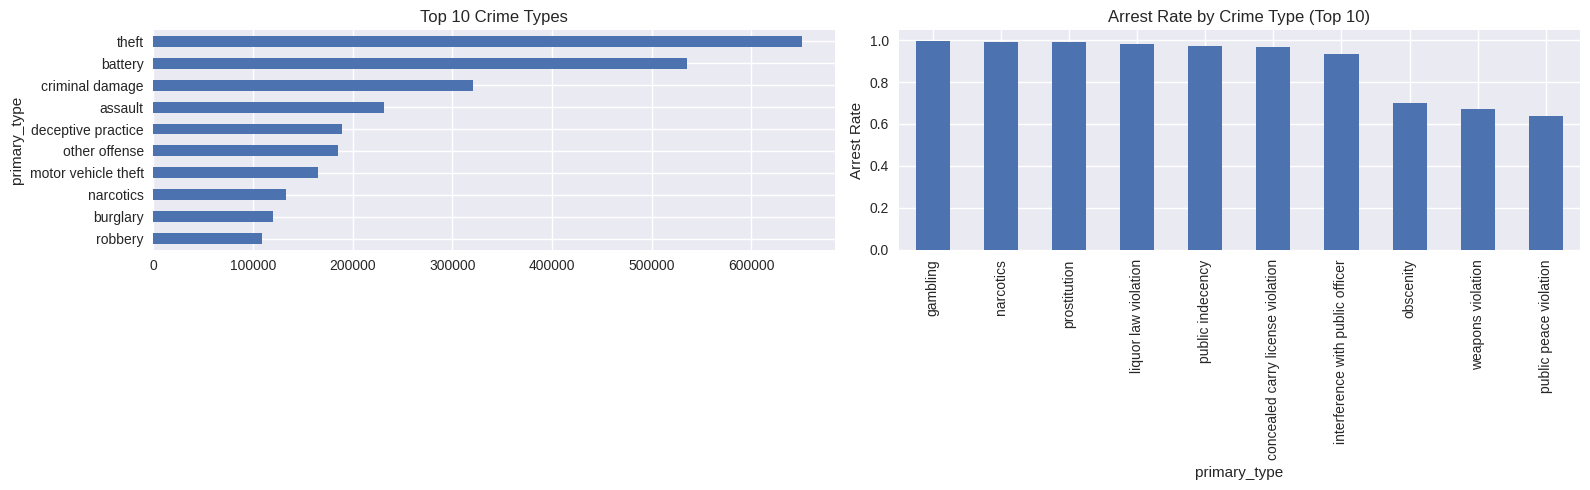

In [82]:
#Crime EDA: Top Crime Types & Arrest Ratios

fig, ax = plt.subplots(1,2, figsize=(16,5))

# Top crime types
if "primary_type" in crime.columns:
    top_types = (crime["primary_type"]
                 .value_counts()
                 .head(10)
                 .sort_values(ascending=True))
    top_types.plot(kind="barh", ax=ax[0], title="Top 10 Crime Types")

# Arrest rate by crime type
if set(["primary_type","arrest"]).issubset(crime.columns):
    arrest_rate = (crime.groupby("primary_type")["arrest"]
                   .mean()
                   .sort_values(ascending=False)
                   .head(10))
    arrest_rate.plot(kind="bar", ax=ax[1], title="Arrest Rate by Crime Type (Top 10)")
    ax[1].set_ylabel("Arrest Rate")

plt.tight_layout()
plt.show()



In [83]:
import plotly.express as px

# Compute total number of crimes per year
yearly_crimes = crime['year'].value_counts().sort_index()

fig = px.line(
    x=yearly_crimes.index,
    y=yearly_crimes.values,
    title='Crime Trends Over Years',
    labels={'x': 'Year', 'y': 'Number of Crimes'},
    markers=True
)

fig.update_traces(line_color='#e74c3c', line_width=3)
fig.show()


In [84]:
import plotly.graph_objects as go
if 'month_name' not in crime.columns:
    crime['month_name'] = crime['date'].dt.month_name()

# Group by month name and count number of crimes
monthly_crimes = crime.groupby('month_name')['date'].count().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthly_crimes.index,
    y=monthly_crimes.values,
    marker_color='#3498db'
))

fig.update_layout(
    title='Crime Distribution by Month',
    xaxis_title='Month',
    yaxis_title='Number of Crimes',
    xaxis_tickangle=-45  # tilt labels for readability
)

# Display the figure
fig.show()


In [85]:
import plotly.graph_objects as go

if 'crime_dow' not in crime.columns:
    crime['crime_dow'] = crime['date'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_crimes = crime['crime_dow'].value_counts().reindex(day_order)

# Create a bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=daily_crimes.index,
    y=daily_crimes.values,
    marker_color='#2ecc71'
))

# Customize chart layout
fig.update_layout(
    title='Crime Distribution by Day of Week',
    xaxis_title='Day of Week',
    yaxis_title='Number of Crimes'
)

fig.show()


In [86]:
import plotly.express as px

if 'crime_hour' not in crime.columns:
    crime['crime_hour'] = crime['date'].dt.hour

# Count crimes by hour of the day (0–23) and sort chronologically
hourly_crimes = crime['crime_hour'].value_counts().sort_index()

fig = px.line(
    x=hourly_crimes.index,
    y=hourly_crimes.values,
    title='Crime Distribution by Hour of Day',
    labels={'x': 'Hour', 'y': 'Number of Crimes'},
    markers=True
)

fig.update_traces(line_color='#9b59b6', line_width=3)
fig.show()


In [87]:
import plotly.express as px

print("\n Geographic Analysis")
print("-" * 80)

#  Crimes by district
if 'district' in crime.columns:
    district_crimes = crime['district'].value_counts().head(15)

    fig = px.bar(
        x=district_crimes.index.astype(str),
        y=district_crimes.values,
        title='Top 15 Districts by Crime Count',
        labels={'x': 'District', 'y': 'Number of Crimes'},
        color=district_crimes.values,
        color_continuous_scale='OrRd'
    )
    fig.update_layout(showlegend=False)
    fig.show()

#  Crimes by neighborhood
if 'neighborhood' in crime.columns:
    neighborhood_crimes = crime['neighborhood'].value_counts().head(20)

    fig = px.bar(
        x=neighborhood_crimes.values,
        y=neighborhood_crimes.index,
        orientation='h',
        title='Top 20 Neighborhoods by Crime Count',
        labels={'x': 'Number of Crimes', 'y': 'Neighborhood'},
        color=neighborhood_crimes.values,
        color_continuous_scale='Reds'
    )
    fig.update_layout(height=700, showlegend=False)
    fig.show()

#  Spatial distribution (map)
if {'latitude', 'longitude'}.issubset(crime.columns):
    # Filter out rows missing coordinate data
    valid_coords = crime.dropna(subset=['latitude', 'longitude'])

    # Sample data to make visualization faster if dataset is huge
    sample_size = min(10000, len(valid_coords))
    sample_coords = valid_coords.sample(sample_size)

    # Create map
    fig = px.scatter_mapbox(
        sample_coords,
        lat='latitude',
        lon='longitude',
        color='primary_type',
        hover_name='primary_type',
        hover_data=['district', 'neighborhood'],
        zoom=10,
        title=f'Crime Locations (Sample of {sample_size:,} incidents)',
        height=600
    )
    fig.update_layout(mapbox_style='carto-positron')
    fig.show()



 Geographic Analysis
--------------------------------------------------------------------------------


In [88]:
if 'domestic' in crime.columns:
    print("\n Domestic Crime Analysis")
    print("-" * 80)

    # Count domestic vs. non-domestic crimes
    domestic_counts = crime['domestic'].value_counts()
    domestic_pct = (crime['domestic'].value_counts(normalize=True) * 100).round(2)

    print(f"\nDomestic Crimes: {domestic_counts.get(True, 0):,} ({domestic_pct.get(True, 0)}%)")
    print(f"Non-Domestic Crimes: {domestic_counts.get(False, 0):,} ({domestic_pct.get(False, 0)}%)")

    # Top crime types among domestic incidents
    if 'primary_type' in crime.columns:
        domestic_by_type = (
            crime[crime['domestic'] == True]['primary_type']
            .value_counts()
            .head(10)
        )

        # create map
        fig = px.bar(
            x=domestic_by_type.index,
            y=domestic_by_type.values,
            title='Top 10 Domestic Crime Types',
            labels={'x': 'Crime Type', 'y': 'Count'},
            color=domestic_by_type.values,
            color_continuous_scale='Oranges'
        )
        fig.update_layout(xaxis_tickangle=-45)
        fig.show()



 Domestic Crime Analysis
--------------------------------------------------------------------------------

Domestic Crimes: 556,613 (19.26%)
Non-Domestic Crimes: 2,333,821 (80.74%)


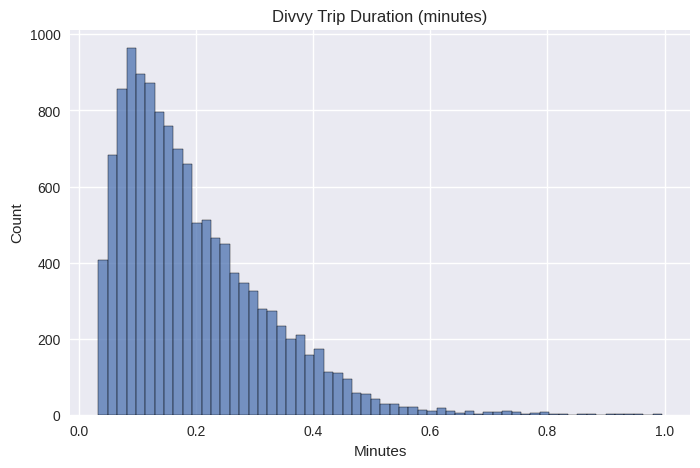

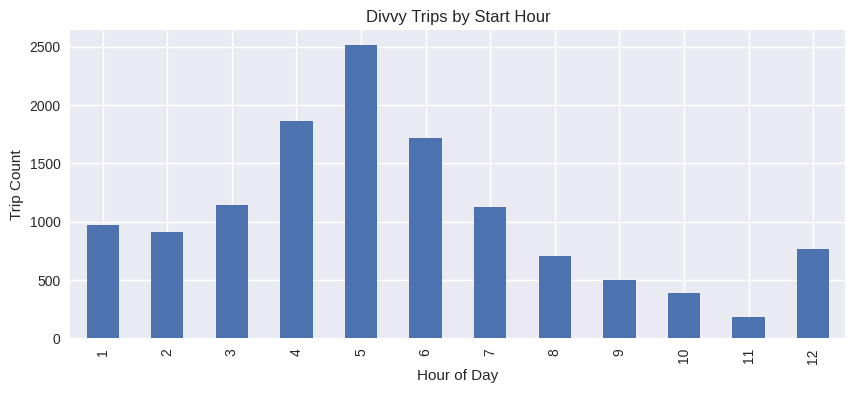

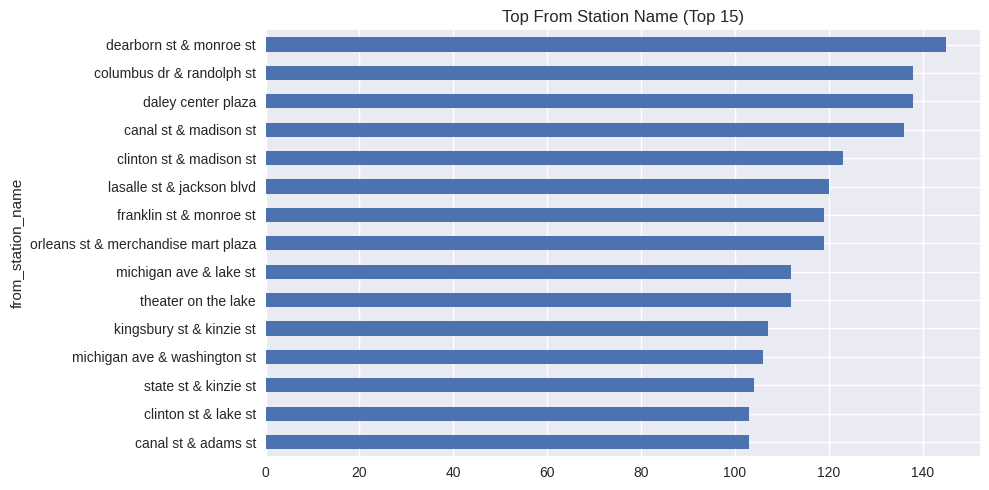

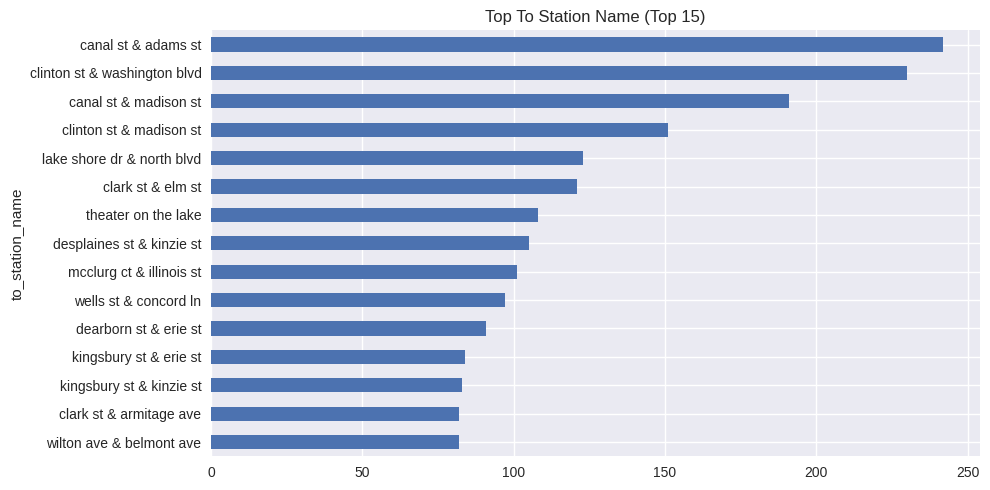

In [89]:

#Divvy EDA: Trip Duration & Usage Patterns

# Trip duration distribution
if "trip_minutes" in divvy.columns:
    fig, ax = plt.subplots(figsize=(8,5))
    sns.histplot(divvy["trip_minutes"].dropna(), bins=60, ax=ax)
    ax.set_title("Divvy Trip Duration (minutes)")
    ax.set_xlabel("Minutes")
    plt.show()

# Peak hours
if "start_hour" in divvy.columns:
    hour_counts = divvy["start_hour"].value_counts().sort_index()
    fig, ax = plt.subplots(figsize=(10,4))
    hour_counts.plot(kind="bar", ax=ax, title="Divvy Trips by Start Hour")
    ax.set_xlabel("Hour of Day"); ax.set_ylabel("Trip Count")
    plt.show()

# Top stations
for col in ["from_station_name","to_station_name"]:
    if col in divvy.columns:
        top_stations = divvy[col].value_counts().head(15)
        fig, ax = plt.subplots(figsize=(10,5))
        top_stations.sort_values().plot(kind="barh", ax=ax, title=f"Top {col.replace('_',' ').title()} (Top 15)")
        plt.tight_layout()
        plt.show()

# Temperature vs trips
if set(["temperature","start_month"]).issubset(divvy.columns):
    trips_by_temp = divvy.groupby("start_month").agg(
        trips=("start_month","count"),
        avg_temp=("temperature","mean")
    ).reset_index()
    fig = px.scatter(trips_by_temp, x="avg_temp", y="trips",
                     trendline="ols", title="Average Temperature vs Trip Volume (Monthly)")
    fig.update_layout(xaxis_title="Avg Temperature", yaxis_title="Trips")
    fig.show()

# Events impact (if 'events' exists: 1/0 or non-null strings)
if "events" in divvy.columns:
    divvy["has_event"] = (~divvy["events"].isna()) & (divvy["events"].astype(str).str.strip()!="")
    trips_event = divvy.groupby("has_event").size().rename("trips").reset_index()
    fig = px.bar(trips_event, x="has_event", y="trips", title="Trips on Event vs Non-Event Days")
    fig.update_layout(xaxis_title="Has Event", yaxis_title="Trips")
    fig.show()


In [90]:
print("Temporal Patterns")
print("-" * 80)

# Convert time columns
divvy['starttime'] = pd.to_datetime(divvy['starttime'], errors='coerce')
divvy['stoptime'] = pd.to_datetime(divvy['stoptime'], errors='coerce')

divvy['start_hour'] = divvy['starttime'].dt.hour
divvy['start_day'] = divvy['starttime'].dt.day_name()
divvy['start_month'] = divvy['starttime'].dt.month_name()
divvy['start_date'] = divvy['starttime'].dt.date

# Rides by hour
hourly_rides = divvy['start_hour'].value_counts().sort_index()

fig = px.line(x=hourly_rides.index, y=hourly_rides.values,
              title='Bike Rides by Hour of Day',
              labels={'x': 'Hour', 'y': 'Number of Rides'},
              markers=True)
fig.update_traces(line_color='#16a085', line_width=3)
fig.show()

# Rides by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = divvy['start_day'].value_counts().reindex(day_order)

fig = go.Figure()
fig.add_trace(go.Bar(x=daily_rides.index, y=daily_rides.values,
                     marker_color='#e67e22'))
fig.update_layout(title='Bike Rides by Day of Week',
                  xaxis_title='Day', yaxis_title='Number of Rides')
fig.show()




Temporal Patterns
--------------------------------------------------------------------------------


In [91]:

# Trip Duration Analysis

print("\n Trip Duration Analysis")
print("-" * 80)

if 'tripduration' in divvy.columns:
    # Convert to minutes
    divvy['duration_minutes'] = divvy['tripduration'] / 60

    print(f"\nAverage Trip Duration: {divvy['duration_minutes'].mean():.2f} minutes")
    print(f"Median Trip Duration: {divvy['duration_minutes'].median():.2f} minutes")
    print(f"Max Trip Duration: {divvy['duration_minutes'].max():.2f} minutes")

    # Filter outliers for visualization
    duration_q99 = divvy['duration_minutes'].quantile(0.99)
    filtered_duration = divvy[divvy['duration_minutes'] <= duration_q99]['duration_minutes']

    fig = px.histogram(filtered_duration, nbins=50,
                       title=f'Trip Duration Distribution (up to 99th percentile: {duration_q99:.1f} min)',
                       labels={'value': 'Duration (minutes)', 'count': 'Frequency'},
                       color_discrete_sequence=['#3498db'])
    fig.show()

#-------------
#  Station Analysis

print("\n Station Analysis")
print("-" * 80)

# Most popular start stations
if 'from_station_name' in divvy.columns:
    top_start = divvy['from_station_name'].value_counts().head(15)

    print("\nTop 15 Start Stations:")
    display(pd.DataFrame(top_start).reset_index().rename(
        columns={'index': 'Station', 'from_station_name': 'Rides'}))

    fig = px.bar(x=top_start.values, y=top_start.index,
                 orientation='h',
                 title='Top 15 Start Stations',
                 labels={'x': 'Number of Rides', 'y': 'Station'},
                 color=top_start.values,
                 color_continuous_scale='Blues')
    fig.update_layout(height=600)
    fig.show()

# Most popular end stations
if 'to_station_name' in divvy.columns:
    top_end = divvy['to_station_name'].value_counts().head(15)

    fig = px.bar(x=top_end.values, y=top_end.index,
                 orientation='h',
                 title='Top 15 End Stations',
                 labels={'x': 'Number of Rides', 'y': 'Station'},
                 color=top_end.values,
                 color_continuous_scale='Greens')
    fig.update_layout(height=600)
    fig.show()

#-------------
#  Weather Impact

if 'temperature' in divvy.columns and 'events' in divvy.columns:
    print("\n Weather Impact Analysis")
    print("-" * 80)

    # Rides by temperature
    temp_rides = divvy.groupby('temperature').size()

    fig = px.scatter(x=temp_rides.index, y=temp_rides.values,
                     title='Bike Rides vs Temperature',
                     labels={'x': 'Temperature (°F)', 'y': 'Number of Rides'},
                     trendline='lowess')
    fig.update_traces(marker=dict(size=8, color='#e74c3c'))
    fig.show()

    # Rides by weather events
    event_rides = divvy['events'].value_counts()

    fig = px.pie(values=event_rides.values, names=event_rides.index,
                 title='Ride Distribution by Weather Events',
                 hole=0.4)
    fig.show()

# ----------------
# Neighborhood Analysis

if 'neighborhood_start' in divvy.columns:
    print("\n Neighborhood Analysis")
    print("-" * 80)

    neighborhood_rides = divvy['neighborhood_start'].value_counts().head(20)

    fig = px.bar(x=neighborhood_rides.values, y=neighborhood_rides.index,
                 orientation='h',
                 title='Top 20 Neighborhoods by Bike Rides',
                 labels={'x': 'Number of Rides', 'y': 'Neighborhood'},
                 color=neighborhood_rides.values,
                 color_continuous_scale='Viridis')
    fig.update_layout(height=700)
    fig.show()


 Trip Duration Analysis
--------------------------------------------------------------------------------

Average Trip Duration: 0.20 minutes
Median Trip Duration: 0.17 minutes
Max Trip Duration: 1.00 minutes



 Station Analysis
--------------------------------------------------------------------------------

Top 15 Start Stations:


,Rides,count
0,dearborn st & monroe st,145
1,daley center plaza,138
2,columbus dr & randolph st,138
3,canal st & madison st,136
4,clinton st & madison st,123
5,lasalle st & jackson blvd,120
6,orleans st & merchandise mart plaza,119
7,franklin st & monroe st,119
8,michigan ave & lake st,112
9,theater on the lake,112



 Weather Impact Analysis
--------------------------------------------------------------------------------



 Neighborhood Analysis
--------------------------------------------------------------------------------
